In [2]:
!pip install mplfinance


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[*********************100%***********************]  1 of 1 completed


C:\Python311\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


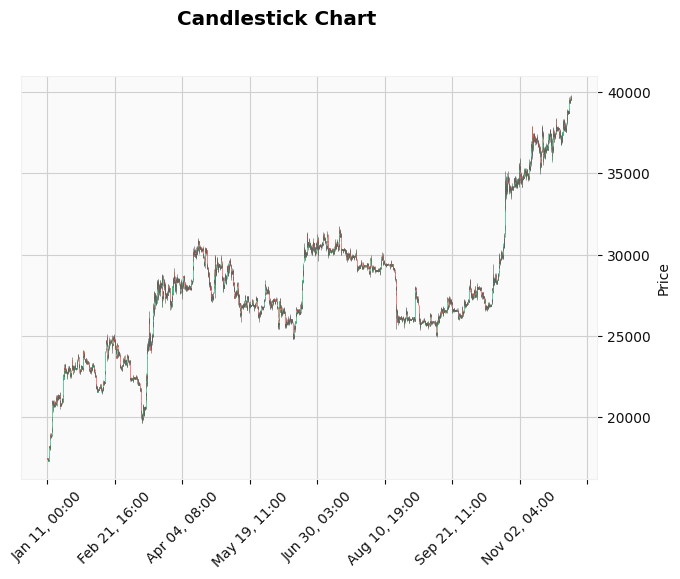

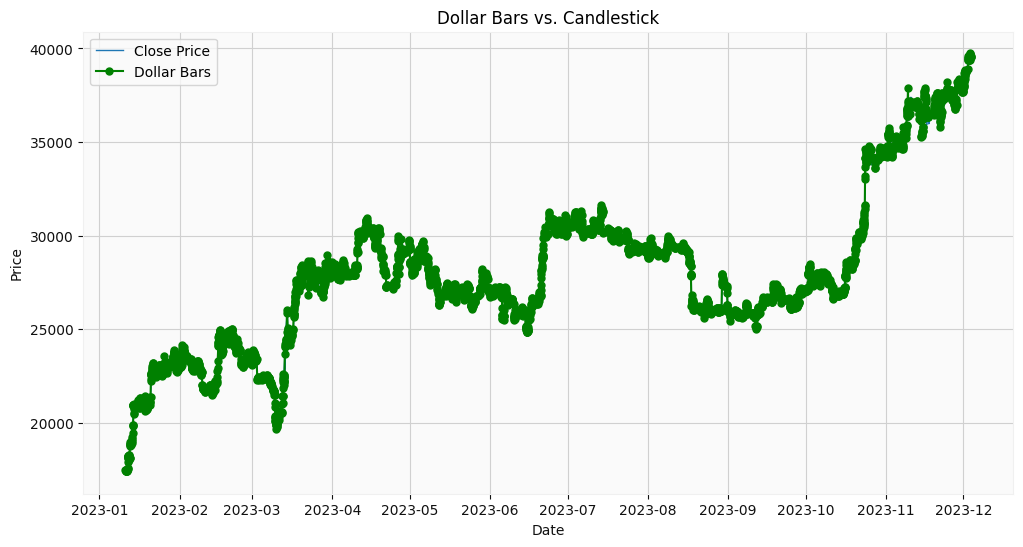

In [5]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

# Fetch historical data for Bitcoin stock on an hourly basis
symbol = "BTC-USD"
start_date = "2023-01-11"
interval = "1h"  # Fetch hourly data

bitcoin_data = yf.download(symbol, start=start_date, interval=interval)

# Define a threshold dollar amount for a bar (e.g., $1 million)
dollar_threshold = 1000000

# Initialize variables to track dollar bars
dollar_bars = []
current_dollar_volume = 0

# Loop through the historical data to create dollar bars
for index, row in bitcoin_data.iterrows():
    # Calculate dollar volume for the current bar
    dollar_volume = row["Volume"] * row["Close"]

    # Check if the current dollar volume exceeds the threshold
    if current_dollar_volume + dollar_volume >= dollar_threshold:
        # Add the current row to the dollar bar and reset the dollar volume
        dollar_bars.append(row)
        current_dollar_volume = 0
    else:
        # Accumulate the dollar volume
        current_dollar_volume += dollar_volume

# Create a DataFrame of dollar bars
dollar_bars_df = pd.DataFrame(dollar_bars)

# Plot the candlestick chart
mpf.plot(bitcoin_data, type='candle', title="Candlestick Chart", style="yahoo")

# Plot the dollar bars curve
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_data.index, bitcoin_data['Close'], label='Close Price', linestyle='-', linewidth=1)
plt.plot(dollar_bars_df.index, dollar_bars_df['Close'], marker='o', markersize=5, label='Dollar Bars', linestyle='-', color='g')
plt.title("Dollar Bars vs. Candlestick")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
